In [ ]:
import scipy
import pandas as pd
import scikitplot as skplt

from sklearn import metrics
from sklearn import model_selection
from sklearn import pipeline
from sklearn import ensemble

from feature_engine import imputation

In [ ]:

df = pd.read_csv("dados_pontos.csv",
                 sep=";")

df

In [17]:
# Definição das variáveis de features e target
features = df.columns[3:-1] # Seleciona as colunas que serão usadas como variáveis independentes
target = 'flActive' # Define a variável dependente como a coluna flActive, que indica se o usuário está ativo (1) ou inativo (0)

In [18]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[features],
                                                                    df[target],
                                                                    test_size=0.2,
                                                                    random_state=42,
                                                                    stratify=df[target])

# Verificação da taxa de resposta
# Mostra que a proporção de usuários ativos é de aproximadamente 32,5% em ambos os conjuntos
print("Taxa Resposta Treino:", y_train.mean())
print("Taxa Resposta Teste:", y_test.mean())

Taxa Resposta Treino: 0.32550335570469796
Taxa Resposta Teste: 0.32662192393736017


In [19]:
# Verificação de valores faltantes
X_train.isna().sum()

qtdeRecencia           0
freqDias               0
freqTransacoes         0
qtdListaPresença       0
qtdChatMessage         0
qtdTrocaPontos         0
qtdResgatarPonei       0
qtdPresençaStreak      0
pctListaPresença       0
pctChatMessage         0
pctTrocaPontos         0
pctResgatarPonei       0
pctPresençaStreak      0
qtdePontosGanhos       0
qtdePontosGastos       0
qtdePontosSaldo        0
avgRecorrencia       810
dtype: int64

In [20]:
# Definição do valor máximo para imputação
max_avgRecorrencia = X_train['avgRecorrencia'].max()

In [21]:
# Definição das colunas para imputação
features_imput_0 = [
    'qtdeRecencia',
    'freqDias',
    'freqTransacoes',
    'qtdListaPresença',
    'qtdChatMessage',
    'qtdTrocaPontos',
    'qtdResgatarPonei',
    'qtdPresençaStreak',
    'pctListaPresença',
    'pctChatMessage',
    'pctTrocaPontos',
    'pctResgatarPonei',
    'pctPresençaStreak',
    'qtdePontosGanhos',
    'qtdePontosGastos',
    'qtdePontosSaldo',
]

# Configuração da imputação
imputacao_0 = imputation.ArbitraryNumberImputer(variables=features_imput_0,
                                                arbitrary_number=0)

imputacao_max = imputation.ArbitraryNumberImputer(variables=['avgRecorrencia'],
                                                  arbitrary_number=max_avgRecorrencia)

# Definição do modelo
model = ensemble.RandomForestClassifier(random_state=42)

# Definição dos hiperparâmetros para busca em grade
params = {
    "n_estimators": [100,150,250,500],
    "min_samples_leaf": [10,20,30,50,100],
}

# Configuração do Grid Search
grid = model_selection.GridSearchCV(model,
                                    param_grid=params,
                                    n_jobs=-1,
                                    scoring='roc_auc')

meu_pipeline = pipeline.Pipeline([ # Organiza o fluxo de trabalho em etapas
    ('imput_0', imputacao_0),
    ('imput_max', imputacao_max),
    ('model', grid),    
    ])

# Treina o pipeline, realizando as etapas de imputação e ajuste do modelo com Grid Search
meu_pipeline.fit(X_train, y_train)

Pipeline(steps=[('imput_0',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['qtdeRecencia', 'freqDias',
                                                   'freqTransacoes',
                                                   'qtdListaPresença',
                                                   'qtdChatMessage',
                                                   'qtdTrocaPontos',
                                                   'qtdResgatarPonei',
                                                   'qtdPresençaStreak',
                                                   'pctListaPresença',
                                                   'pctChatMessage',
                                                   'pctTrocaPontos',
                                                   'pctResgatarPonei',
                                                   'pctPresençaStreak',
                                                   'qtdePontosGanhos',
                                                   'qtdePontosGastos',
                                                   'qtdePontosSaldo'])),
                ('imput_max',
                 ArbitraryNumberImputer(arbitrary_number=26.0,
                                        variables=['avgRecorrencia'])),
                ('model',
                 GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'min_samples_leaf': [10, 20, 30, 50,
                                                               100],
                                          'n_estimators': [100, 150, 250, 500]},
                              scoring='roc_auc'))])

In [22]:
# Resultados detalhados da busca em grade (Grid Search), incluindo métricas de desempenho para cada combinação de hiperparâmetros
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.448948,0.020748,0.022161,0.004215,10,100,"{'min_samples_leaf': 10, 'n_estimators': 100}",0.867751,0.834965,0.832305,0.792495,0.840660,0.833635,0.024122,11
1,0.716007,0.043829,0.033756,0.012610,10,150,"{'min_samples_leaf': 10, 'n_estimators': 150}",0.868285,0.835568,0.832837,0.793783,0.839408,0.833976,0.023774,9
2,1.163113,0.061950,0.043133,0.006596,10,250,"{'min_samples_leaf': 10, 'n_estimators': 250}",0.869140,0.835213,0.832766,0.794105,0.840410,0.834327,0.023958,6
3,2.389996,0.195397,0.093672,0.024165,10,500,"{'min_samples_leaf': 10, 'n_estimators': 500}",0.868784,0.835993,0.833121,0.795214,0.840982,0.834819,0.023513,3
4,0.444689,0.034452,0.025466,0.005753,20,100,"{'min_samples_leaf': 20, 'n_estimators': 100}",0.872150,0.831666,0.829574,0.797593,0.839373,0.834071,0.023811,7
5,0.725652,0.131044,0.043634,0.023386,20,150,"{'min_samples_leaf': 20, 'n_estimators': 150}",0.871919,0.833085,0.829184,0.799006,0.840374,0.834713,0.023343,4
6,1.261185,0.055823,0.042242,0.006441,20,250,"{'min_samples_leaf': 20, 'n_estimators': 250}",0.872738,0.834965,0.829184,0.800329,0.843093,0.836062,0.023323,1
7,2.176356,0.111543,0.067693,0.013338,20,500,"{'min_samples_leaf': 20, 'n_estimators': 500}",0.871669,0.834468,0.830638,0.801116,0.841662,0.835911,0.022593,2
8,0.424038,0.017216,0.027450,0.008953,30,100,"{'min_samples_leaf': 30, 'n_estimators': 100}",0.867662,0.831205,0.828049,0.798362,0.839319,0.832919,0.022221,12
9,0.596757,0.062923,0.024751,0.004711,30,150,"{'min_samples_leaf': 30, 'n_estimators': 150}",0.868802,0.831879,0.829255,0.800436,0.839677,0.834010,0.021895,8


In [23]:
# Previsões e probabilidades
y_train_predict = meu_pipeline.predict(X_train)
y_train_proba = meu_pipeline.predict_proba(X_train)[:,1]

y_test_predict = meu_pipeline.predict(X_test)
y_test_proba = meu_pipeline.predict_proba(X_test)

In [24]:
# Calcula a acurácia (proporção de previsões corretas)
acc_train = metrics.accuracy_score(y_train, y_train_predict)
acc_test = metrics.accuracy_score(y_test, y_test_predict)
print("Acurárica base train:", acc_train)
print("Acurárica base test:", acc_test)

# Calcula a AUC (área sob a curva ROC), que mede a capacidade do modelo de distinguir entre as classes
auc_train = metrics.roc_auc_score(y_train, y_train_proba)
auc_test = metrics.roc_auc_score(y_test, y_test_proba[:,1])
print("\nAUC base train:", auc_train)
print("AUC base test:", auc_test)

Acurárica base train: 0.8098434004474273
Acurárica base test: 0.8008948545861297

AUC base train: 0.8729569506419792
AUC base test: 0.8565284667546533


In [25]:
# Importância de cada feature no modelo de Random Forest
f_importance = meu_pipeline[-1].best_estimator_.feature_importances_
(pd.Series(f_importance, index=features)
   .sort_values(ascending=False))

qtdeRecencia         0.353056
freqDias             0.134334
qtdePontosGanhos     0.127601
freqTransacoes       0.089548
qtdListaPresença     0.068551
qtdePontosSaldo      0.065951
qtdChatMessage       0.048080
avgRecorrencia       0.046721
pctChatMessage       0.020132
pctListaPresença     0.019342
pctPresençaStreak    0.006598
qtdResgatarPonei     0.005811
pctResgatarPonei     0.005073
qtdPresençaStreak    0.004463
pctTrocaPontos       0.002892
qtdTrocaPontos       0.001781
qtdePontosGastos     0.000069
dtype: float64

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

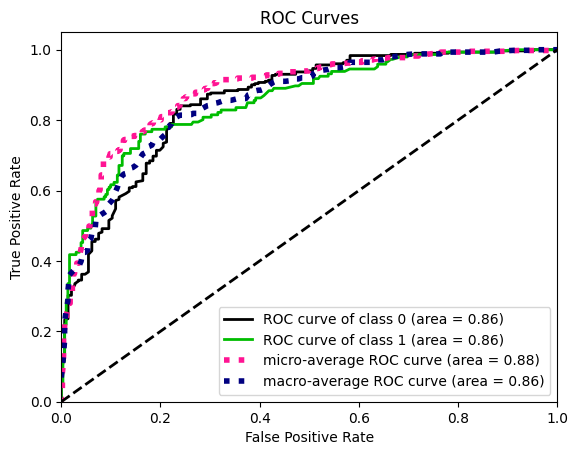

In [26]:
# Curva ROC ajuda a visualizar o desempenho do modelo em termos de distinção entre as classes
skplt.metrics.plot_roc(y_test, y_test_proba)

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

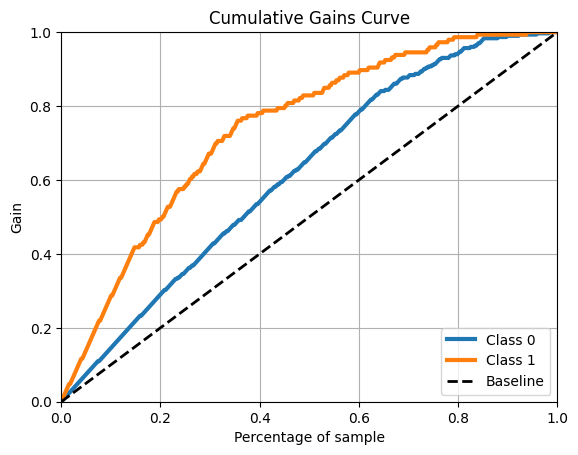

In [27]:
# Curva de Gnaho Cumulativo é útil para entender como o modelo performa em diferentes percentis da população
skplt.metrics.plot_cumulative_gain(y_test, y_test_proba)

In [28]:
# Taxa de captura de usuários ativos em diferentes percentis da população, ordenados pela probabilidade prevista
usuarios_test = pd.DataFrame(
    {"verdadeiro": y_test,
     "proba": y_test_proba[:,1]}
)

usuarios_test = usuarios_test.sort_values("proba", ascending=False)
usuarios_test["sum_verdadeiro"] = usuarios_test["verdadeiro"].cumsum()
usuarios_test["tx captura"]=usuarios_test["sum_verdadeiro"] / usuarios_test["verdadeiro"].sum()
usuarios_test

,verdadeiro,proba,sum_verdadeiro,tx captura
681,1,0.987057,1,0.006849
1176,1,0.978627,2,0.013699
436,1,0.978177,3,0.020548
1016,1,0.978071,4,0.027397
927,1,0.972690,5,0.034247
...,...,...,...,...
2109,0,0.044296,146,1.000000
2059,0,0.044296,146,1.000000
1207,0,0.042749,146,1.000000
1577,0,0.042749,146,1.000000


<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

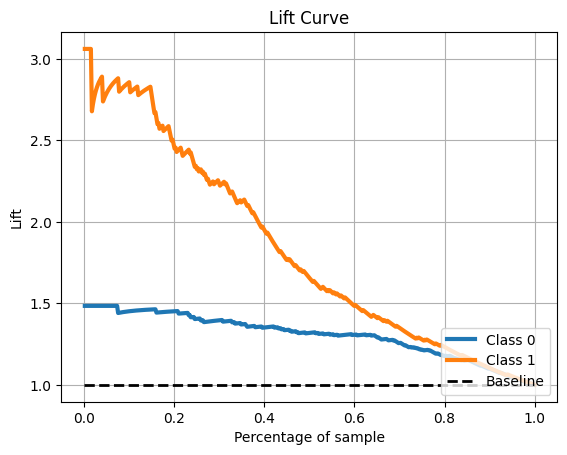

In [29]:
# Curva Lift é calculada como a razão entre a taxa de verdadeiros positivos (TPR) do modelo e a taxa de positivos na população
skplt.metrics.plot_lift_curve(y_test, y_test_proba)

In [32]:
# Cálculo do Lift para os 500 primeiros usuários
usuarios_test.head(100)['verdadeiro'].mean()/usuarios_test['verdadeiro'].mean()

2.4186986301369866

O resultado ~2.4 significa que, nos 100 primeiros usuários (ordenados pela probabilidade prevista), o modelo capturou 2.4 vezes mais usuários ativos do que se tivéssemos selecionado aleatoriamente. Isso é útil para priorizar ações de marketing ou engajamento, por exemplo, pois indica que o modelo está conseguindo identificar os usuários mais propensos a serem ativos.